Diagnosing the model
=================
## Contents

1. [Sensitivity analysis of features](#1.-sensitivity-analysis-of-the-features)
    * [Latitudinal sensitivity](#latitudinal-sensitivity)
    * [Longitudinal sensitivity](#longitudinal-sensitivity)
    * [Temperoral sensitivity](#temperoal-sensitivity)
    * [Temperature sensitivity](#temperature-sensitivity)
    * [Precipitation sensitivity](#precipitation-sensitivity)
2. [Model Analysis](#2.-model-analysis)
    * [Residuals](#residuals)
    * [Piso.Ai Comparison](#pisoai-comparison)
    * [isoP Comparison](#isoP-comparison)

## Importing the results

In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
# Import the results
results = pd.read_csv('results_test.csv')
results = results.rename(columns={
    "Precipitation (kg/m^2/s)": "Precip",
    "Temperature (K)": "Temp",
    "Predictions": "Pred"
})

# Convert the date from ordinal to datetime
#results['Date'] = results['Date'].apply(lambda x: datetime.datetime.fromordinal(x))
#Convert Day column from day of year to month/day
# Assuming 'Year' and 'Day' are the columns in your dataframe
results['Day'] = results['Day'].astype(str).str.zfill(3)
results['Date'] = pd.to_datetime(results['Year'].astype('str') + results['Day'].str.zfill(3), format='%Y%j')
results.drop(['Year', 'Day'], axis=1, inplace=True)

# Set index to date
results = results.set_index('Date')

results.head()

,Lat,Long,Alt,Precip,Temp,Pred,Actual
Date,,,,,,,
2003-11-02,82.31,-62.17,30,0.000000,240.15315,-32.329876,-34.07
2003-11-02,63.52,-116.00,241,0.000000,267.63196,-27.996933,-23.35
2003-11-02,46.29,-64.15,45,0.000056,274.37950,-13.962460,-8.56
2003-11-02,79.59,-85.56,10,0.000000,240.76923,-32.996030,-33.20
2003-11-02,45.32,-75.67,114,0.000043,274.78870,-15.856003,-11.10


In [3]:
# Extract the station locations from the original data
isoData = pd.read_csv("Isoscape_Data.csv")
stations = isoData[['Station', 'Lat', 'Long']].drop_duplicates()
stationList = stations['Station'].tolist()
stations.set_index('Station', inplace=True)

In [4]:
# Separating the results by station into a dictionary
results_station = {}
for stat in stationList:
    results_station[stat] = results[results['Lat'] == stations.loc[stat, 'Lat']]

# 1. Sensitivity analysis of the features

## Latitudinal Sensitivity

RES is empty
HAL is empty
SKT is empty
EGB is empty


IndexError: index 15 is out of bounds for axis 0 with size 15

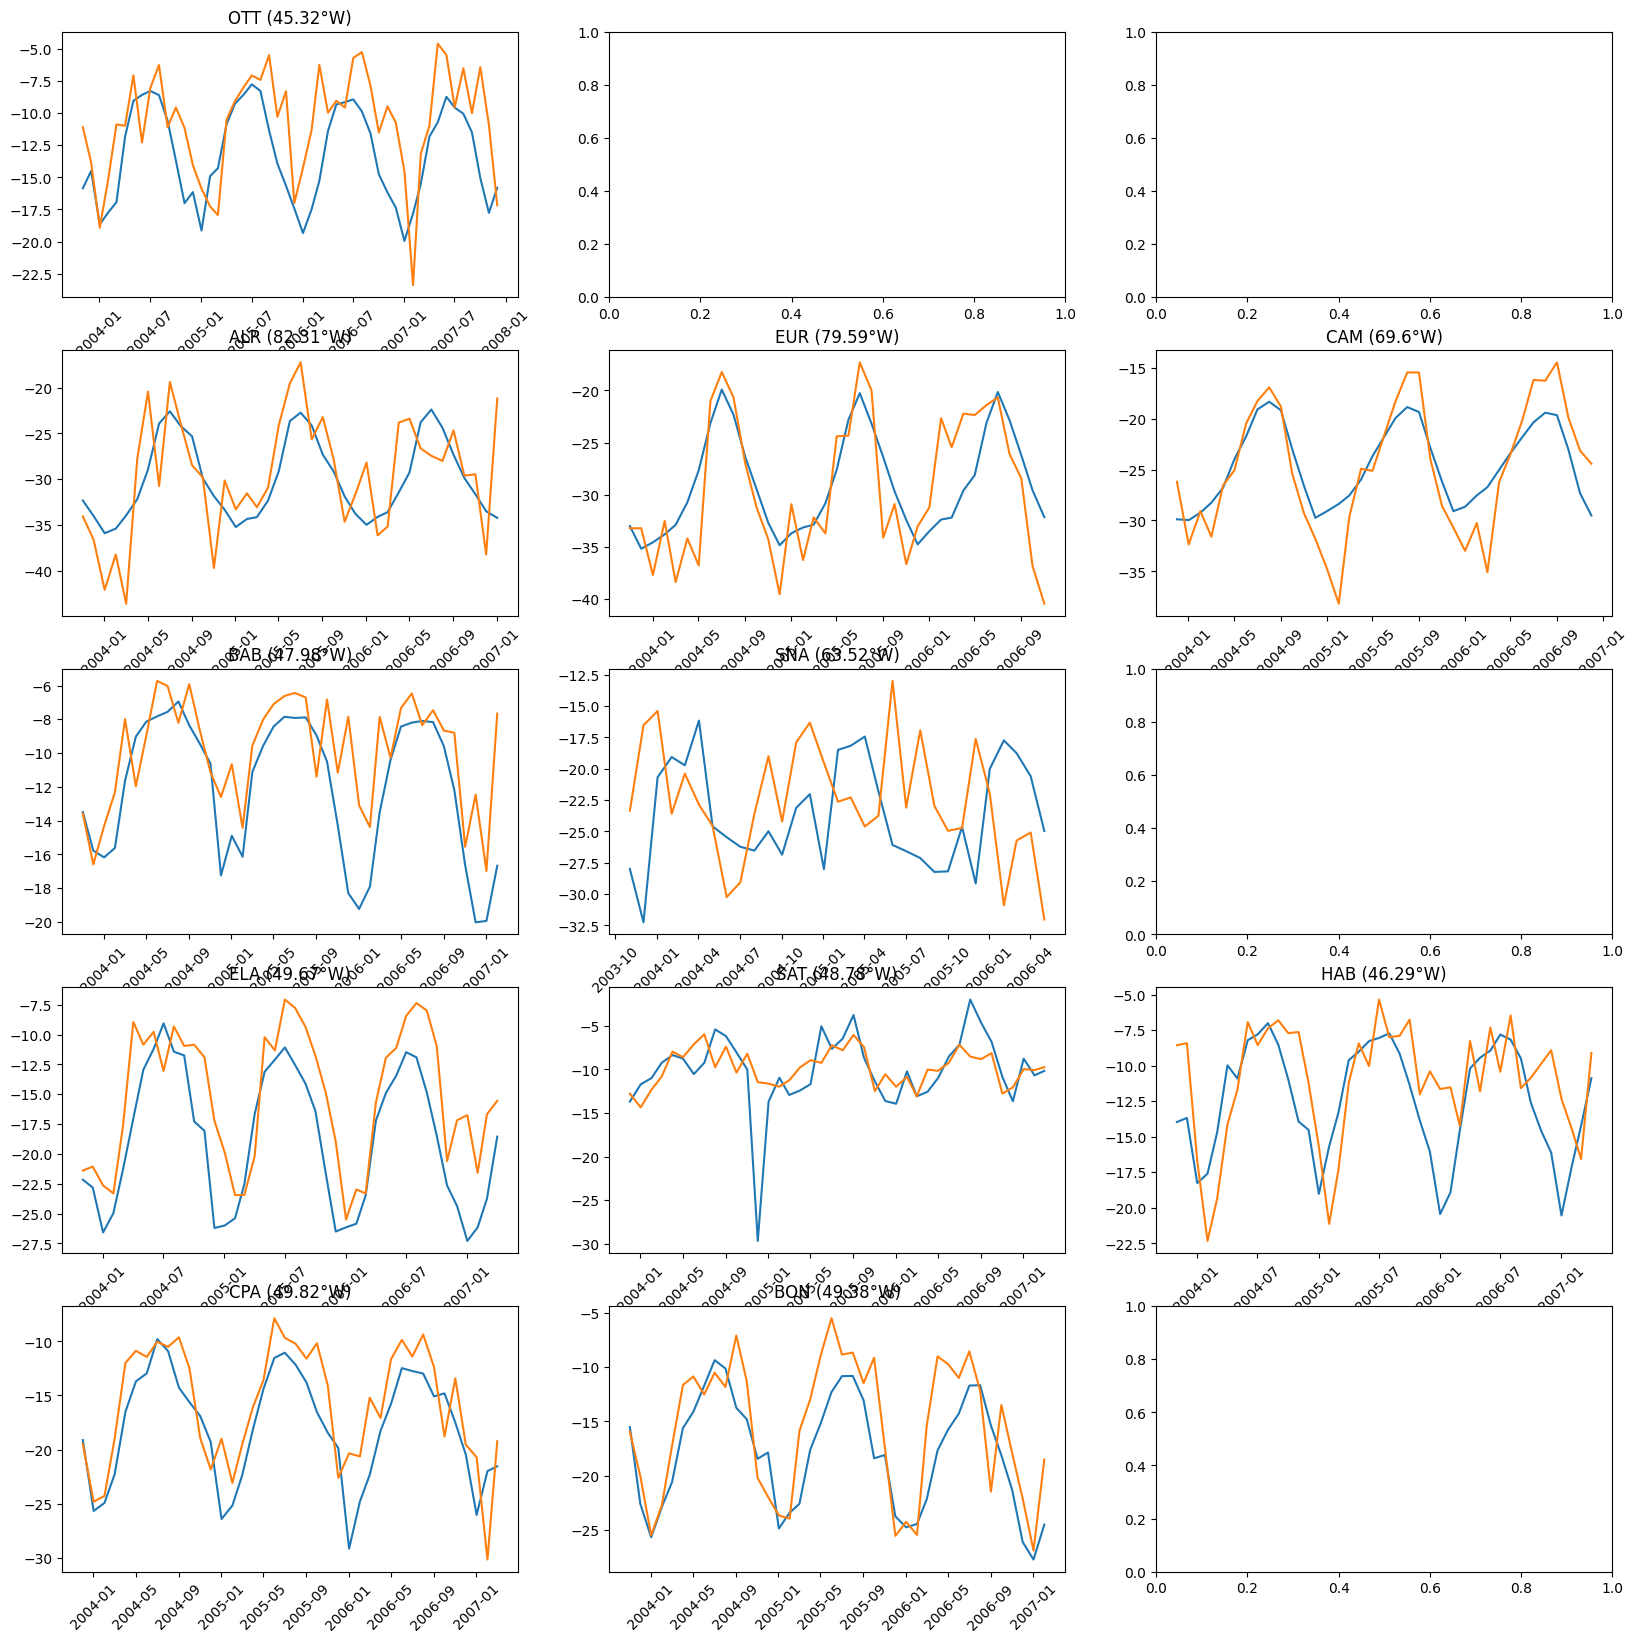

In [6]:
figure, axes = plt.subplots(5, 3, figsize=(20, 20))

for stat in stationList:
    data = results_station[stat]
    if data.empty:
        print(stat + ' is empty')
        continue
    latitude = data['Lat'].unique()[0]
    ax = axes.flat[stationList.index(stat)]
    ax.plot(data.index, data['Pred'], label='Predicted')
    ax.plot(data.index, data['Actual'], label='Actual')
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_title(stat + ' (' + str(latitude) + '°W)')


plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Create a big subplot covering all the smaller ones and set its x-axis label
big_ax = figure.add_subplot(111, frameon=False)
big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_ax.set_xlabel('Date', labelpad=30, fontsize=20) 
big_ax.set_ylabel(r'$\delta$O18 (‰)', labelpad=30, fontsize=20)  

# Add a single legend for all subplots
handles, labels = ax.get_legend_handles_labels()
big_ax.legend(handles, labels, loc='upper right')

plt.show()
plt.close()

## Longitudinal Sensitivity

RES is empty
HAL is empty
CAM is empty
SKT is empty
EGB is empty
EST is empty


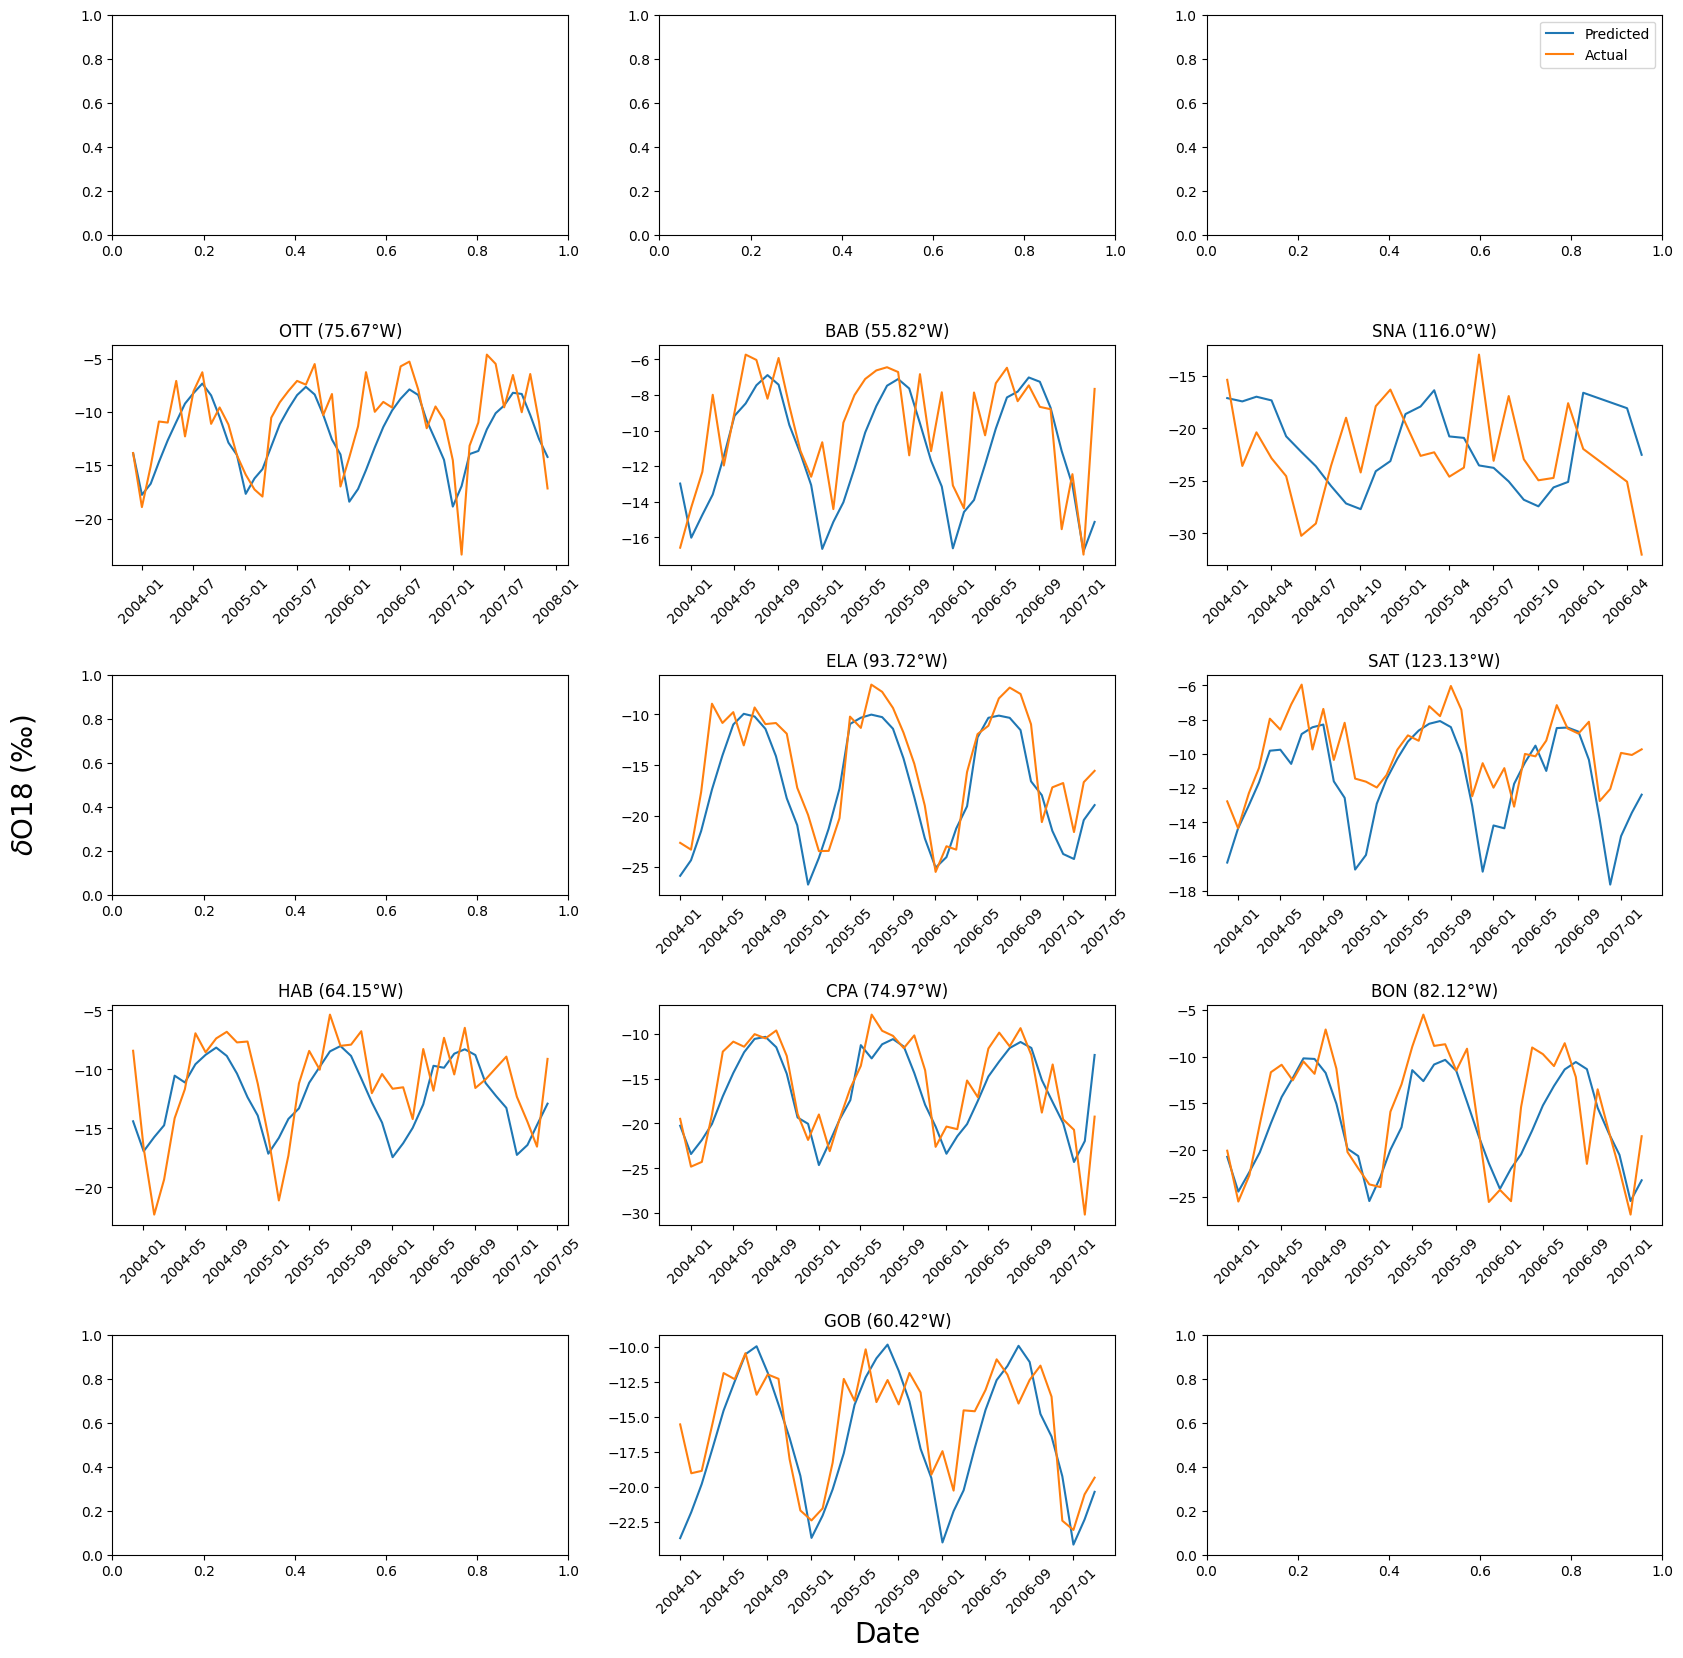

In [ ]:
# Similar to the latitude plot, but for longitude
figure, axes = plt.subplots(5, 3, figsize=(20, 20))

for stat in stationList:
    data = results_station[stat]
    if data.empty:
        print(stat + ' is empty')
        continue
    longitude = data['Long'].unique()[0]
    ax = axes.flat[stationList.index(stat)]
    ax.plot(data.index, data['Pred'], label='Predicted')
    ax.plot(data.index, data['Actual'], label='Actual')
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_title(stat + ' (' + str(longitude) + '°W)')


plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Create a big subplot covering all the smaller ones and set its x-axis label
big_ax = figure.add_subplot(111, frameon=False)
big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_ax.set_xlabel('Date', labelpad=30, fontsize=20) 
big_ax.set_ylabel(r'$\delta$O18 (‰)', labelpad=30, fontsize=20)  

# Add a single legend for all subplots
handles, labels = ax.get_legend_handles_labels()
big_ax.legend(handles, labels, loc='upper right')

plt.show()
plt.close()

## Temperoral Sensitivity

## Temperature Sensitivity

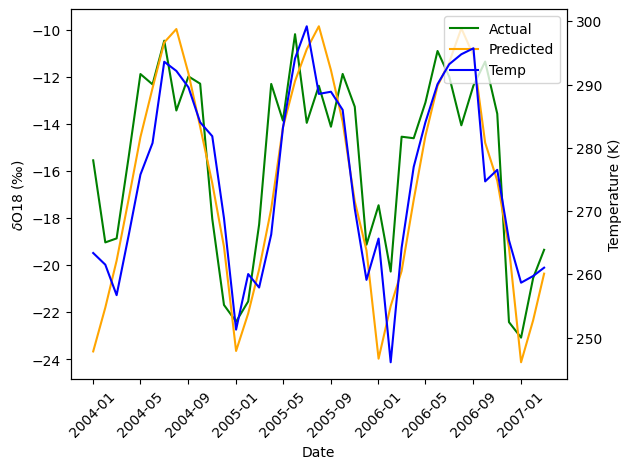

In [ ]:
df = results_station["GOB"]
# Plotting the precipitation on one axis and the isotopes on the other
fig, ax1 = plt.subplots()

# Plotting the isotopes
ax1.set_xlabel('Date')
ax1.set_ylabel(r'$\delta$O18 (‰)')
ax1.plot(df.index, df['Actual'], label='Actual', color='green')
ax1.plot(df.index, df['Pred'], label='Predicted', color='orange')
ax1.tick_params(axis='y')


# Plotting the precipitation
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (K)')
ax2.plot(df.index, df['Temp'], label='Temp', color='blue')
ax2.tick_params(axis='y')

ax1.xaxis.set_tick_params(rotation=45)

# Adding the legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
ax1.legend(handles, labels, loc='upper right')

plt.show()

## Precipitation Sensitivity

### The actual model
This first graph is the version of the model where there are months with no precipitation. 

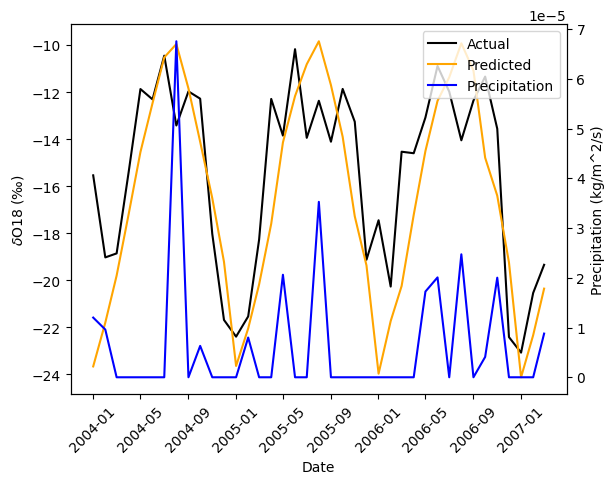

In [ ]:
df = results_station["GOB"]
# Plotting the precipitation on one axis and the isotopes on the other
fig, ax1 = plt.subplots()

# Plotting the isotopes
ax1.set_xlabel('Date')
ax1.set_ylabel(r'$\delta$O18 (‰)')
ax1.plot(df.index, df['Actual'], label='Actual', color='Black')
ax1.plot(df.index, df['Pred'], label='Predicted', color='orange')
ax1.tick_params(axis='y')


# Plotting the precipitation
ax2 = ax1.twinx()
ax2.set_ylabel('Precipitation (kg/m^2/s)')
ax2.plot(df.index, df['Precip'], label='Precipitation', color='blue')
ax2.tick_params(axis='y')

ax1.xaxis.set_tick_params(rotation=45)

# Adding the legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
ax1.legend(handles, labels, loc='upper right')
plt.show()

### The model with artificial precipitation
This second graph is the version of the model where there are no months with no precipitation, to see if the model is better at predicting the isotopes when there is precipitation. We will fill in the zeros with 3e-5 kg/m^2/s.

In [ ]:
# Take the results_test and copy it to exaggPrecip
exaggPrecip = results.copy()

exaggPrecip.reset_index(inplace=True)
# Fill values that are 0 with 5e-5
exaggPrecip['Precip'] = exaggPrecip['Precip'].replace(0, 5e-5)

# Convert Date to Year and Day of year
exaggPrecip['Year'] = exaggPrecip['Date'].dt.year
exaggPrecip['Day'] = exaggPrecip['Date'].dt.dayofyear

actuals = exaggPrecip['Actual']
# Remove Predictions column (Pred) and Date column
exaggPrecip.drop(['Pred', 'Date', 'Actual'], axis=1, inplace=True)


exaggPrecip.head()

,Lat,Long,Alt,Precip,Temp,Year,Day
0,47.98,55.82,190.0,0.00005,271.142517,2003,336
1,49.38,82.12,245.0,0.00005,265.255096,2003,336
2,46.29,64.15,45.0,0.00005,270.236603,2003,336
3,45.32,75.67,114.0,0.00005,269.147888,2003,336
4,48.78,123.13,178.0,0.00005,252.437027,2003,336


In [ ]:
# Load in model
import tensorflow as tf
model = tf.keras.models.load_model('BestModel.keras')

exaggPrecipTensor = exaggPrecip.copy()
exaggPrecipTensor = np.array(exaggPrecipTensor)
exaggPrecipTensor = tf.keras.utils.normalize(exaggPrecipTensor, axis=1)

# Make the exaggPrecip dataframe into a tensor
exaggPrecipTensor = tf.data.Dataset.from_tensor_slices(exaggPrecip)

# Make predictions based 
exaggPrecip['Pred'] = model.predict(exaggPrecipTensor.batch(32))


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Redo the Date column
exaggPrecip['Day'] = exaggPrecip['Day'].astype(str).str.zfill(3)
exaggPrecip['Date'] = pd.to_datetime(exaggPrecip['Year'].astype('str') + exaggPrecip['Day'].str.zfill(3), format='%Y%j')

# Readd the actuals
exaggPrecip['Actual'] = actuals

# Set index to date
exaggPrecip = exaggPrecip.set_index('Date')

# Drop the Year and Day columns
exaggPrecip.drop(['Year', 'Day'], axis=1, inplace=True)

exaggPrecip.head()

In [ ]:
# Redoing the graph for GOB (53.32°N)
df = exaggPrecip[exaggPrecip['Lat'] == 53.32]
# Plotting the precipitation on one axis and the isotopes on the other
fig, ax1 = plt.subplots()

# Plotting the isotopes
ax1.set_xlabel('Date')
ax1.set_ylabel(r'$\delta$O18 (‰)')
ax1.plot(df.index, df['Actual'], label='Actual', color='Black')
ax1.plot(df.index, df['Pred'], label='Predicted', color='orange')
ax1.tick_params(axis='y')


# Plotting the precipitation
ax2 = ax1.twinx()
ax2.set_ylabel('Precipitation (kg/m^2/s)')
ax2.plot(df.index, df['Precip'], label='Precipitation', color='blue')
ax2.tick_params(axis='y')

ax1.xaxis.set_tick_params(rotation=45)

# Adding the legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
ax1.legend(handles, labels, loc='upper right')
plt.show()


# Examining beyond the results

## Plot predictions vs. actuals

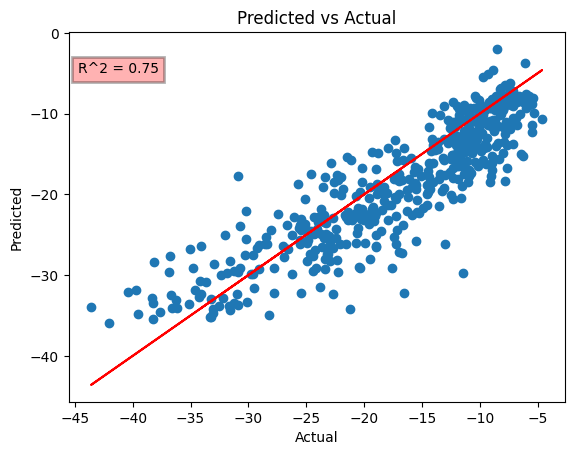

In [8]:
# Calculating the R^2 value
from sklearn.metrics import r2_score
coeff = r2_score(results['Actual'], results['Pred'])

# Plotting the results
plt.plot(results['Actual'], results['Pred'], 'o')
plt.plot(results['Actual'], results['Actual'], color='red')

# Placing the R^2 value in the plot
plt.text(0.1, 0.9, 'R^2 = ' + str(round(coeff, 2)),\
        ha='center',\
        va='center',\
        transform=plt.gca().transAxes,\
        bbox=dict(facecolor='red', alpha=0.3, edgecolor='black', linewidth=2))


# Labeling the axes
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
plt.close()

## Residuals

## Piso.Ai Comparison

In [ ]:
# Load in the Piso.Ai results, parameters set to LAT: 49.82, LONG: 7.6
piso = pd.read_csv('PisoAi_Results.csv', skiprows=3)
piso.drop(['Unnamed: 0'], axis=1, inplace=True)

# Convert the date to datetime
piso['Date'] = pd.to_datetime(piso['Date'])


# Load in Europe data
europe = pd.read_csv("Europe_Data.csv")

# Convert the date to datetime
europe['Date'] = pd.to_datetime(europe['Time'])
europe.drop(['Time'], axis=1, inplace=True)

# Convert Europe data to monthly averages
europe = europe.groupby(pd.Grouper(key='Date', freq='M')).mean()

# Keep only 2003 Jan 1 to 2007 Jan
europe = europe[(europe.index >= '2003-01-01') & (europe.index <= '2007-02-01')]

# Separate the date from index
europe.reset_index(inplace=True)

# Making dates the same
europe['Date'] = piso['Date']

# Take the Alt from piso
europe['Alt'] = piso['Elevation']

#piso pred column rename
piso = piso.rename(columns={'d18O.Piso.AI': 'Pred'})

In [ ]:
# Preparing Features
features = ['Lat', 'Lon', 'Alt', 'Precipitation', 'Temperature','Year', 'Day']

europe['Year'] = europe['Date'].dt.year
europe['Day'] = europe['Date'].dt.dayofyear

# Make predictions
europe['Pred'] = model.predict(europe[features])

In [ ]:
# Compare the results
plt.plot(europe['Date'], europe['Pred'], label='isoNet')
plt.plot(piso['Date'], piso['Pred'], label='Piso.Ai')
plt.legend()

# Labeling the axes
plt.title('Piso Ai vs isoNet')
plt.xlabel('Date')
plt.ylabel(r'$\delta$O18 (‰)')
# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()
plt.close()

## isoP Comparison

In [10]:
# Load in isoP data
isoP = pd.read_csv("isoP_Output.csv")

# Change Longitiude from negative to positive
isoP['Lon'] = isoP['Lon'].abs()

# Change the month and year to a date
isoP['Date'] = pd.to_datetime(isoP['Year'].astype(str) + '-' + isoP['Month'].astype(str))
isoP.drop(['Year', 'Month'], axis=1, inplace=True)
isoP.set_index('Date', inplace=True)


# Separate into stations based on Lat and Lon values in the stations dataframe
# Separating the results by station into a dictionary
isoP_station = {}
for stat in stationList:
    isoP_station[stat] = isoP[isoP['Lat'] == stations.loc[stat, 'Lat']]

isoP_station['GOB'].head()

,Lat,Lon,isoP
Date,,,
2004-01-01,53.32,60.42,-19.513741
2004-02-01,53.32,60.42,-20.263142
2004-03-01,53.32,60.42,-19.190520
2004-04-01,53.32,60.42,-15.520732
2004-05-01,53.32,60.42,-12.118591


RES is empty
HAL is empty
SKT is empty
EGB is empty


IndexError: index 15 is out of bounds for axis 0 with size 15

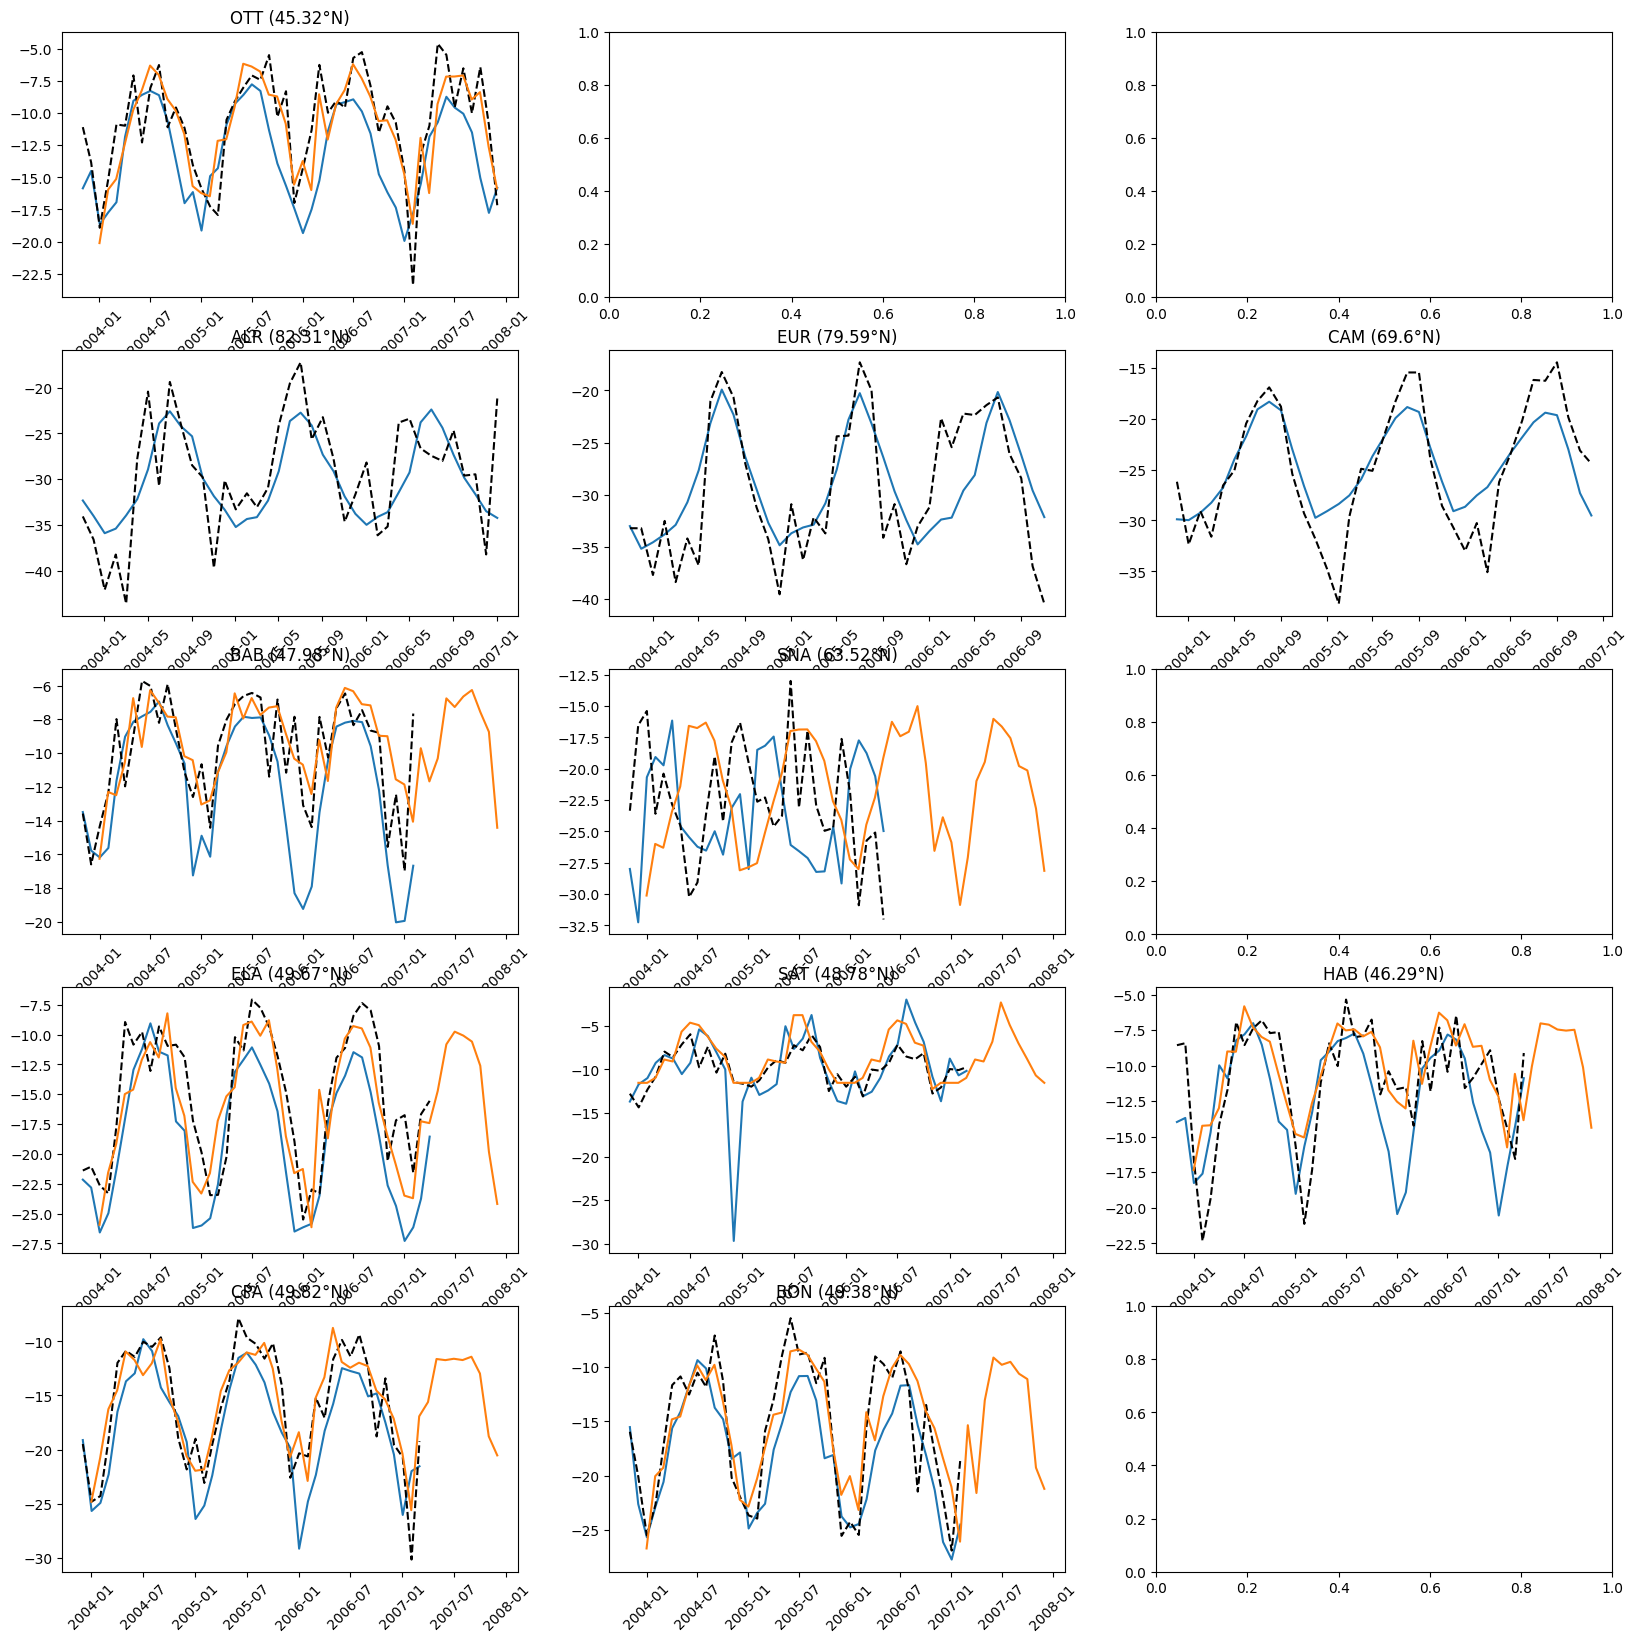

In [11]:
# Preforming the same comparison as before with the latitudes but with both isoP and isoNet and actuals as well
figure, axes = plt.subplots(5, 3, figsize=(20, 20))

for stat in stationList:
    data_r = results_station[stat]
    data_i = isoP_station[stat]
    if data_r.empty:
        print(stat + ' is empty')
        continue
    latitude = data_r['Lat'].unique()[0]
    ax = axes.flat[stationList.index(stat)]
    ax.plot(data_r.index, data_r['Pred'], label='Predicted')
    ax.plot(data_r.index, data_r['Actual'], label='Actual', color='black', linestyle='dashed')
    ax.plot(data_i.index, data_i['isoP'], label='isoP')
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_title(stat + ' (' + str(latitude) + '°N)')


plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Create a big subplot covering all the smaller ones and set its x-axis label
big_ax = figure.add_subplot(111, frameon=False)
big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_ax.set_xlabel('Date', labelpad=30, fontsize=20) 
big_ax.set_ylabel(r'$\delta$O18 (‰)', labelpad=30, fontsize=20)  

# Add a single legend for all subplots
handles, labels = ax.get_legend_handles_labels()
big_ax.legend(handles, labels, loc='upper right')

plt.show()
plt.close()

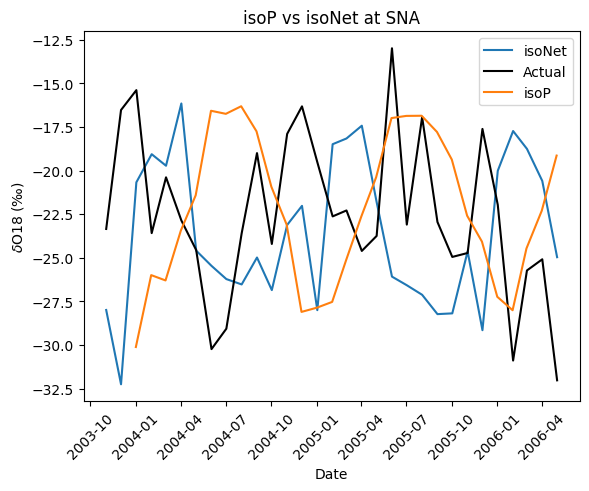

In [12]:
# Examining just the SNA station
df = results_station["SNA"]
df_i = isoP_station["SNA"]

# Limit df_i to the same dates as df
df_i = df_i[(df_i.index >= df.index.min()) & (df_i.index <= df.index.max())]

plt.plot(df.index, df['Pred'], label='isoNet')
plt.plot(df.index, df['Actual'], label='Actual', color='black')
plt.plot(df_i.index, df_i['isoP'], label='isoP')
plt.legend()

# Labeling the axes
plt.title('isoP vs isoNet at SNA')
plt.xlabel('Date')
plt.ylabel(r'$\delta$O18 (‰)')
# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()
plt.close()